### 分类算法:
    逻辑回归  决策树  随机森林 支持向量  朴素贝叶斯.....
    分类的应用场景:
        信用评级  风险等级 ....
    

In [1]:
!pip install sklearn
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=be3e17def50420043cfeb621a9ef935383e3df47b61d7f19c65e21b0bb567de3
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\b5\39\b2\13b2d6aa5d88f4ef3d456f394d2bc36d2d1132ad8400657567
Successfully built sklearn
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, \
    f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split # 训练数据  测试数据划分
import xgboost as xgb 
from imblearn.over_sampling import SMOTE # 样本不平衡 ->

import pandas as pd
import matplotlib.pyplot as plt
import prettytable # 表格库

In [3]:
raw_data = pd.read_csv('./classification.csv')

In [5]:
# 分割数据 -> x 特征(训练), y 目标(分类结果)
X, y = raw_data.iloc[:, :-1], raw_data.iloc[:, -1]

In [6]:
X

,level,retention_days,age,reg_source,address,income,education,total_orders,is_activity,sex,...,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,...,1,0,0,1.308,NaN,NaN,2.015,NaN,4.159,1
1,3,11,33,1,7,136.0,5,5,0.0,0,...,1,1,0,1.482,3.033,NaN,2.725,3.575,4.913,4
2,3,68,52,1,24,116.0,1,29,0.0,1,...,0,1,0,2.899,2.890,NaN,3.409,NaN,4.754,3
3,2,33,33,0,12,33.0,2,0,0.0,1,...,0,0,0,2.246,NaN,NaN,NaN,NaN,3.497,1
4,2,23,30,1,9,30.0,1,2,0.0,0,...,1,1,0,1.841,NaN,NaN,NaN,NaN,3.401,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,...,0,0,1,1.099,NaN,3.369,NaN,NaN,3.296,1
996,1,7,34,0,2,22.0,5,5,0.0,1,...,0,0,0,1.537,NaN,3.243,NaN,NaN,3.091,1
997,3,67,59,0,40,944.0,5,33,0.0,1,...,1,1,1,3.287,3.466,3.999,3.577,4.187,6.850,4
998,3,70,49,0,18,87.0,2,22,0.0,1,...,1,1,0,3.243,3.512,NaN,3.229,NaN,4.466,3


In [7]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    1
Name: churn, Length: 1000, dtype: int64

In [8]:
X.shape

(1000, 41)

In [9]:
# 缺失值用均值填充
X = X.fillna(X.mean())

In [10]:
X.isnull().sum()

level             0
retention_days    0
age               0
reg_source        0
address           0
income            0
education         0
total_orders      0
is_activity       0
sex               0
reside            0
tollfree          0
equip             0
callcard          0
wireless          0
longmon           0
tollmon           0
equipmon          0
cardmon           0
wiremon           0
longten           0
tollten           0
equipten          0
cardten           0
wireten           0
multline          0
voice             0
pager             0
internet          0
callid            0
callwait          0
forward           0
confer            0
ebill             0
loglong           0
logtoll           0
logequi           0
logcard           0
logwire           0
lninc             0
custcat           0
dtype: int64

In [11]:
# 样本均衡处理 
model_smote = SMOTE()
# 过抽样处理
# X 特征 -> 建模的列  y目标
X, y = model_smote.fit_resample(X, y)

In [12]:
X.shape

(1452, 41)

In [13]:
y.shape

(1452,)

In [14]:
X = pd.DataFrame(X, columns=raw_data.columns[:-1])
# 测试和训练的 对比为 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1016, 41), (436, 41), (1016,), (436,))

In [17]:
# 二元分类 -> 模型分类对象 (1, 0)
# XGB分类模型 -> 树的数量,  每个树的样本比例
# binary:logistic  逻辑回归
# param_dist = {'objective':'binary:logistic', ''}
model_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, max_depth=10, n_jobs=-1, subsample=0.8)
model_xgb.fit(X_train, y_train) # 训练

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
# 预测
pre_y = model_xgb.predict(X_test)

In [20]:
pre_y

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
# Tp 真正 预测正 实际正
# TN 真负  预测负  实际负
# fp 假正 预测正 实际负
# FN 假负  预测负  实际正

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, pre_y).ravel() # 真实指标   预测指标
confusion_matrix_table = prettytable.PrettyTable(['', 'prediction-0', 'prediction-1']) 
# 创建一个表 -> 两组预测值 -> 实际值 (两组)
confusion_matrix_table.add_row(['actual-0', tp, fn])
confusion_matrix_table.add_row(['actual-1', fp, tn])
confusion_matrix_table

,prediction-0,prediction-1
actual-0,183,31
actual-1,60,162


In [22]:
y_score = model_xgb.predict_proba(X_test)

In [23]:
y_score

array([[0.42525482, 0.5747452 ],
       [0.13434106, 0.86565894],
       [0.14750749, 0.8524925 ],
       [0.52329624, 0.4767038 ],
       [0.8420547 , 0.15794526],
       [0.9112934 , 0.08870663],
       [0.1704362 , 0.8295638 ],
       [0.29096204, 0.70903796],
       [0.97274613, 0.0272539 ],
       [0.04947793, 0.95052207],
       [0.5613551 , 0.4386449 ],
       [0.82041717, 0.1795828 ],
       [0.4473843 , 0.5526157 ],
       [0.2590018 , 0.7409982 ],
       [0.8537742 , 0.1462258 ],
       [0.05953532, 0.9404647 ],
       [0.7754835 , 0.22451654],
       [0.32617712, 0.6738229 ],
       [0.04844439, 0.9515556 ],
       [0.12027824, 0.87972176],
       [0.3590958 , 0.6409042 ],
       [0.8838249 , 0.11617512],
       [0.16748118, 0.8325188 ],
       [0.05098784, 0.94901216],
       [0.14582998, 0.85417   ],
       [0.06213927, 0.9378607 ],
       [0.9193524 , 0.08064757],
       [0.9448903 , 0.05510969],
       [0.89730966, 0.10269032],
       [0.86583066, 0.13416936],
       [0.

In [25]:
# roc -> fpr  tpr
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # ROC曲线  ROC空间
auc_s = auc(fpr, tpr) # AUC 曲线下面积

In [27]:
auc_s

0.8631598888608233

In [29]:
scores = [round(i(y_test, pre_y), 3) for i in (accuracy_score, precision_score, recall_score, f1_score)]

In [30]:
scores

[0.791, 0.753, 0.855, 0.801]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

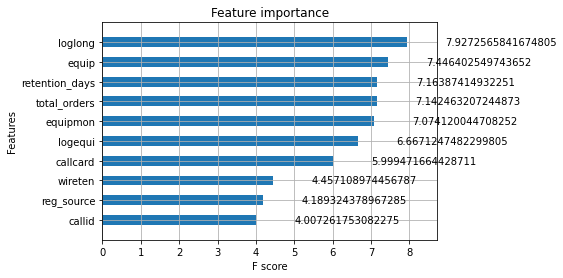

In [32]:
# 特征(列) ->模型 哪些列是重要?
# importance_type 特征重要性如何计算
xgb.plot_importance(model_xgb, height=0.5, importance_type='gain', max_num_features=10)

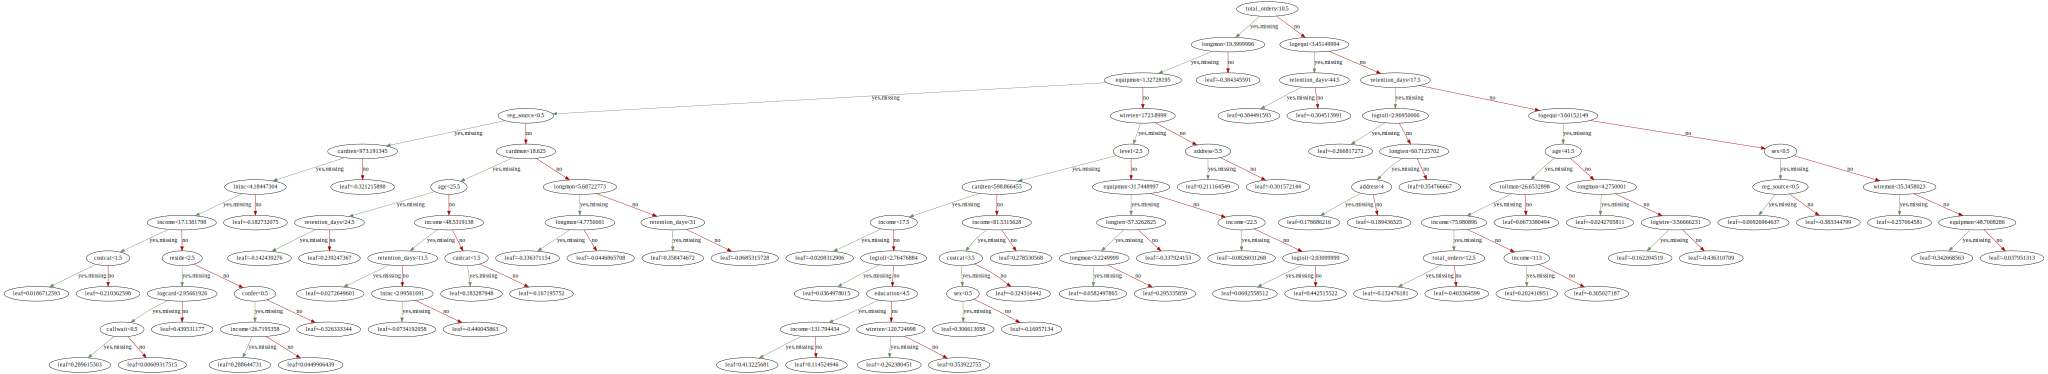

In [33]:
# 树形结构
xgb.to_graphviz(model_xgb, num_trees=1, yes_color='#638e5e', no_color='#a40000')

### 大数据
    算法逻辑比较差的 => 数据分析
    
    数据挖掘  数据算法
    
       描述性分析:
       
       预测性分析: 回归 聚类 分类
       
       决策性分析: 分类
       
       判断性分析: 问题发现  业务总结
       
大数据行业:
     1. 各行各业 -> 数据分析  工作当中
     2. 数据分析岗位空缺  -> 10W+左右空缺  -> 20K左右
     3. 时代技术体系  -> Python主流方向
     4. 发展前景 ->零基础 -> 数据分析 -> 机器学习(分类 聚类  回归) 深度学习(NLP  计算机时间) 推荐算法 ->

技能:
    没有完全开源 -> AI (?)  -> 人脸识别? -> 图像处理技术
    Python  AI -> 天眼  海燕.... 
    人机交互  算法  AI

就业内推: 找工作 (简历指导 修改 模拟面试笔试)
    学员内推 
    腾讯内推
    讲师内推
学习 C  -> 数字

生态链  -> 深度学习  -> 生物 科研  机器算法  -深度 神经元   
(算法  科学)  AI  医疗建模 (健康  疾病  )  生物 -> 神经  -> 
深度学习 DNA序列   深度学习  

数据分析  辅导 补课 解答  


In [16]:
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: bool = True, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
 |          code, we recommend that you set this parameter to False.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      learning_rate : Optional[float]
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : Optional[int]
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 